<a href="https://colab.research.google.com/github/abdullahridwan/DataSci/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bring in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["titanic_train.csv"]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


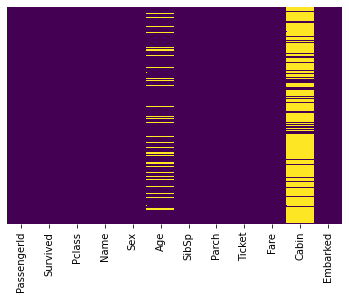

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Theres a good chance that we can fill in the age data with reasonable numbers given the info from the other columns. However, there is too mushc of the Cabin Data missing for us to fill it up with, and hence we may need to drop it later. 

#Exploratory Data Analysis

In [5]:
sns.set_style('whitegrid')

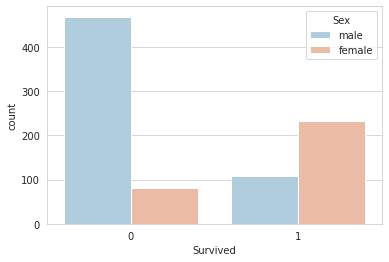

In [6]:
#Number of people who survived. We see that of those who survived, many were female. Of those who died, the majority was male. 
sns.countplot(x="Survived",hue="Sex", data=df, palette='RdBu_r')

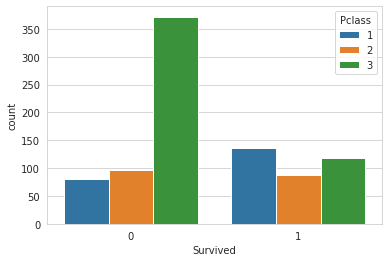

In [ ]:
sns.countplot(x="Survived",hue="Pclass", data=df)
#3rd class is the lowest class. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


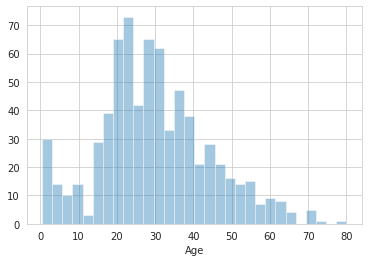

In [ ]:
#Age distribution of the people on the titanic
sns.distplot(df['Age'].dropna(),kde=False, bins=30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


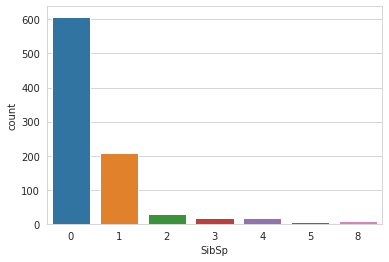

In [ ]:
#Count of the number of Spiblings/Spouses
sns.countplot(x="SibSp", data=df)

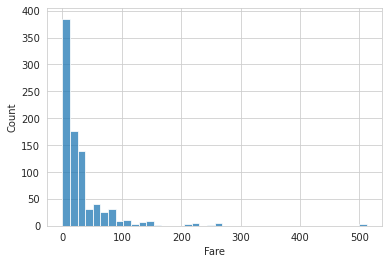

In [ ]:
#Count of fares
sns.histplot(data = df["Fare"], bins=40)

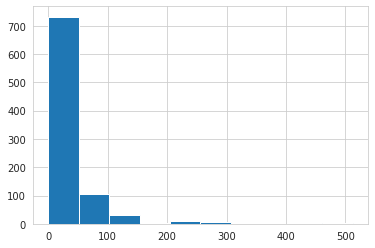

In [ ]:
#similar graph using pandas -> (bins=10) -> add as argument to sns.histplot above
df['Fare'].hist()

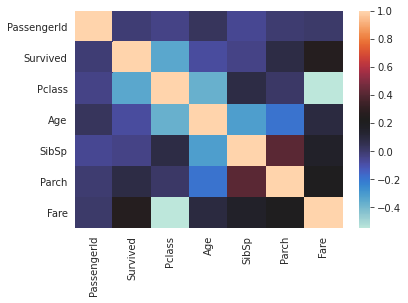

In [ ]:
sns.heatmap(df.corr(), cmap="icefire")

#Cleaning our Data
Essentially, we need to make our data suitable for processing by the model. 

##Dealing with Missing Values


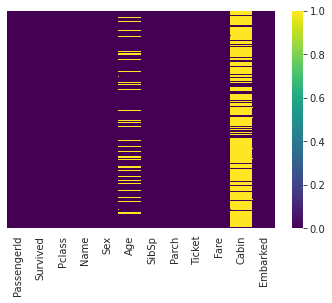

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
#Previoiusly, we had this where we showedthe values that are null. 
#We see that the Age col has a few missing, the values of which we can fill in 
#The Cabin col has alot missing, and so we will not be able to fill it in

#We can fill in the null values in age with the mean age BY PASSENGER CLASS

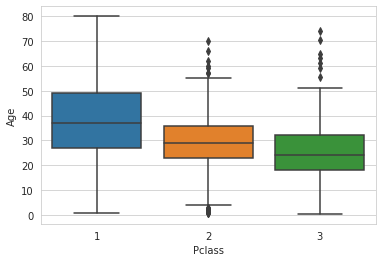

In [8]:
sns.boxplot(x="Pclass", y="Age", data=df)
#Lower the class, lower the average age. 

In [9]:
df.groupby(df["Pclass"])["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [10]:
def calc_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [11]:
df['Age'] = df[['Age', 'Pclass']].apply(calc_age, axis = 1)

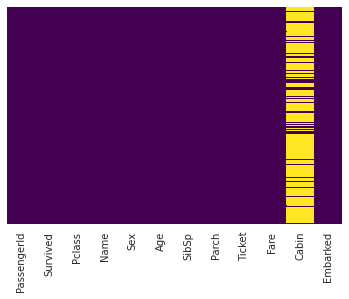

In [12]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap='viridis')

In [13]:
df.drop('Cabin', axis = 1, inplace=True)

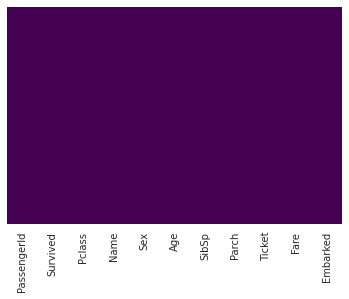

In [14]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap='viridis')

##Deal with Categorical features.
Turn the categorical features into dummy variables so the machine learning model can take them in. For example, the ML model cant simply take in the a string "male" or "female". We need to make a dummy variable that stores these values to them use in our model. 


In [15]:
#not needed
pd.get_dummies(df['Sex'])
#multicolinearity -> one coloumn becomes a perfect predictor of another coloumn. 
#Basically, our ML model can predict wheter you are male or not, by only looking at the female column
#This causes colinearity which decreases the precision of estimation coeff
#So we drop it

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [17]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)
#dropping only one coloumn is sufficieng. bc you cant predict C now
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
train = pd.concat([df,sex,embark], axis=1)

In [19]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [20]:
#Drop Ticket, Name, Sex, Embarked
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
train.drop(['PassengerId'], axis = 1, inplace=True)
#Since we will make 2 ml models, I made a deep copy of the dataframe, train, called
#fmodel and smodel


##Logistic Regression ML Model

###ML Model with Pclass **not** a dummy variable

Predict if the passenger survived or not



In [29]:
fmodel = train.copy(deep=True)
fmodel.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
X = fmodel.drop('Survived', axis = 1)
y = fmodel['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=300)

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]])

###ML Model with Pclass as a dummy variable



In [30]:
smodel = train.copy(deep=True)
smodel.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
pclass_var = pd.get_dummies(smodel['Pclass'], drop_first=True)
pclass_var.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
smodel.drop('Pclass', axis = 1, inplace=True)

In [63]:
smodel.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [67]:
smodel_dummy = pd.concat([smodel, pclass_var], axis = 1)
smodel_dummy.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
X = smodel_dummy.drop('Survived', axis = 1)
y = smodel_dummy['Survived']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [73]:
logmodel_two = LogisticRegression(max_iter= 300)
logmodel_two.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
y_predict_two = logmodel_two.predict(X_test)
print(classification_report(y_test, y_predict_two))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [80]:
print(confusion_matrix(y_test, y_predict_two))

[[137  17]
 [ 38  76]]


#To reiterate on the meaning of the metrics

## Accuracy

- number of correct predictions / total number of predictions
- Not a good choice with an unbalanced class
- What if we had 99 images of dogs and 1 image of a cat for the test set? Then, our model would be one that always predicted dog, and that wont hold up in the real world

## Recall

- number of true positive / (number of true positive + # of false negative)
- Check Confusion matrix below for clarification of True Postives, etc
- Ability of a model to find all relevant cases within a dataset which fixes the problem for an unbalanced class above

## Precision

- num of True Positive / (# of True Positive + # of false positives)
- Check Confusion matrix below for clarification of True Postives, etc
- Ability of a classification model to indetify only the relevant data points

## Balancing Recall and Precision

Theres usually a tradeoff between the two, because recall is the ability to find all relevant instances in a data set and precision is the proportion of the data points our model says was relevant, that was actually relevant

## F-1 Score

- Hence, we want to find an optimal blend of both precision and recall. We combine the two metrics into an F1 Score
- This is the ***Harmonic mean*** of precision and recall that uses recall and precision in th\e following equation

$$ F_1 = 2 * \frac{precision * recall}{precision + recall}$$

- We use this because it punishes extreme values. So bascially, what if we have a precision of 1.0 (perfect) and recall is 0.0 (absolute garbage). The F1 score would then be 0
